In [1]:
import numpy as np
# scipy.special for the sigmoid function expit()
import scipy.special

# neural network class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self,inputnodes, hiddennodes, outputnodes, learnningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes 

        # learnning rate
        self.lr = learnningrate
        
        # link weight matraices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is the sigmoid function\n",
        self.activation_function = lambda x: scipy.special.expit(x)

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    
    # query the neural network
    def query(self, inputs_list):
        # contert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T # .T change row to col  
        hidden_inputs = np.dot(self.wih, inputs)

        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
       
        final_outputs = self.activation_function(final_inputs)
       
        return final_outputs

In [69]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def lorenz(s, t):
    sigma = 10
    rho = 28
    beta = 3
    x, y, z = s
    return np.array([sigma * (y - x), x * (rho - z), x * y - beta * z])

def recons(X, m, tao):
    
    N = X.size
    M = N - (m - 1) * tao

    Xr = np.zeros( (m, M-1) )

    for j in range(M-1):
        for i in range(m):
            Xr[i,j] = X[ (i-1) * tao + j]
    return Xr

def normal(data):
    # normalization  : newvalue(0-1) = （oldvalue - min）/（max - min）
    data_max = np.max(data)
    data_min = np.min(data)
    data = ( data - data_min ) / ( data_max - data_min )
    data = data * 0.99 + 0.01
    return data


# range
a =   10000
b = a + 10000
# lorenz
s0 = (0., 1., 0.)
t = np.arange(0, 210, 0.01)
s = odeint(lorenz, s0, t).T
s = normal(s)   # normalization
data = s[0][a:b]

# reconstuction
m, tao =  5, 18
train_data = recons(data, m, tao)

In [70]:
# number of input, hidden, output nodes
input_nodes = m 
hidden_nodes = tao
output_nodes = 1
# learnning rate 
learnning_rate = 0.1
# craete instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learnning_rate)

# targets = X(t + 1 + (m-1)tao)
targets = s[0][a + 1 + (m-1)*tao :  b + 1 + (m-1)*tao]
# training the neural network
for i in range(len(train_data)):
    inputs = train_data[:,i]
    target = targets[i]
    n.train(inputs, target)



    

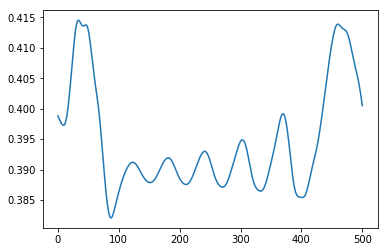

In [75]:
# forecast
inputs = train_data[:,0]
q = n.query(inputs)
res = np.array(q)
num = 600  # number of forecast
for i in range(num):
    inputs = train_data[:,i]
    q = n.query(inputs)
    res = np.append(res,q)
plt.plot(res[100:])

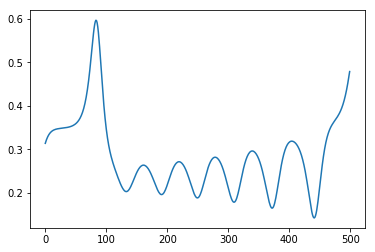

In [76]:
plt.plot(train_data[0,100:num])

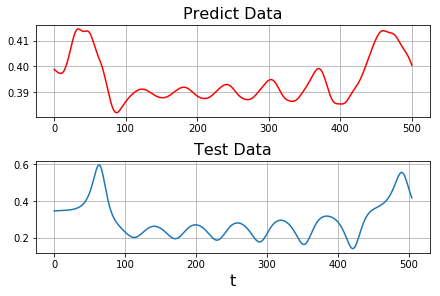

In [77]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

ax1.plot(res[100:],'r')
ax1.grid(True)
ax1.set_title("Predict Data", fontsize=16)
# ax1.set(xlim=(0,400), ylim=(0.513,0.520))


ax2.plot(train_data[0,120:num+25])
ax2.set_xlabel('t', fontsize=16)
ax2.grid(True)
ax2.set_title("Test Data", fontsize=16)
plt.show()